In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import math
from helper import save_data,load_data
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [2]:
train=pd.read_csv('./data/train.csv')
val=pd.read_csv('./data/val.csv')
test=pd.read_csv('./data/test.csv')

In [3]:
training_data_class =train.iloc[:,-1].copy().as_matrix()
training_data=train.iloc[:,1:785].copy().as_matrix()
validating_data_class =val.iloc[:,-1].copy().as_matrix()
validating_data=val.iloc[:,1:785].copy().as_matrix()
testing_data=test.iloc[:,1:785].copy().as_matrix()

In [4]:
training_data=1*(training_data>127)
validating_data=1*(validating_data>127)
testing_data=1*(testing_data>127)
#training_data=np.concatenate((training_data,validating_data))

In [5]:
def sigmoid(x):
    x=np.array(x)
    return 1 / (1 + np.exp(-x))

In [6]:
def sampleH(W,c,u):
    #        
    p=sigmoid(c+np.matmul(W,u))
    h=np.random.binomial(1,p)
    return h
def sampleU(W,b,h):
    p=sigmoid(b+np.matmul(W.T,h))
    v=np.random.binomial(1,p)
    return v

In [30]:
def RBM(hlen,D,k=1,epochs=10,eta=0.01,data=None):
    vlen=D.shape[1]
    if data is None:
        W=np.random.normal(0,1,(hlen,vlen))
        b=np.random.normal(0,1,(vlen,1))
        c=np.random.normal(0,1,(hlen,1))
    else:
        W,b,c=data
    step=0
    for epoch in range(epochs):
        loss=0
        step=0
        for v in D:
            step+=1
            u=v #u is actually v0
            u=np.expand_dims(u,1)
            for t in range(k):
                h=sampleH(W,c,u)
                u=sampleU(W,b,h)
            
            if step%1000==1:
                #print step
                plt.imsave('gen.jpg',np.reshape(u,(28,28)),cmap='gray')
                plt.imsave('real.jpg',np.reshape(v,(28,28)),cmap='gray')
            v=np.expand_dims(v,axis=1)
            
            W += eta*(np.matmul(sigmoid(np.matmul(W,v)+c),v.T)-np.matmul(sigmoid(np.matmul(W,u)+c),u.T))
            b += eta*(v-u)
            c += eta*(sigmoid(np.matmul(W,v)+c)-sigmoid(np.matmul(W,u)+c))
            loss+=np.linalg.norm(v-u)
        print 'epoch %d , loss %.4f'%(epoch,loss) 
    return W,b,c

In [31]:
W,b,c=RBM(100,training_data,data=(W,b,c))

/home/mak/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


epoch 0 , loss 538115.3363
epoch 1 , loss 533932.2338
epoch 2 , loss 529771.0773
epoch 3 , loss 526469.3007
epoch 4 , loss 522710.3812
epoch 5 , loss 519718.8071
epoch 6 , loss 516867.0410
epoch 7 , loss 514054.4302
epoch 8 , loss 512314.2364
epoch 9 , loss 511172.6831


In [36]:
hids=[sampleH(W,c,np.expand_dims(u,1)) for u in validating_data]
hids=np.array(hids)[:,:,0]

/home/mak/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
W=load_data(name="weights.dat")

In [11]:
W,b,c=W[0],W[1],W[2]

In [33]:
save_data([W,b,c],"weightsnew.dat")

In [38]:
def tsne_plot(instances,labels,data=None):
    if data is None:
        tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23,verbose=1)
        new_values = tsne_model.fit_transform(instances)
    else:
        new_values = data
    print 'plotting'
    plt.figure(figsize=(16, 16)) 
    plt.scatter(new_values[:,1],new_values[:,0], c=labels, cmap=plt.cm.get_cmap("jet", 10))
    cbar=plt.colorbar(ticks=range(10))
    cbar.set_ticklabels(['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
    plt.clim(-0.5, 9.5)
    plt.savefig('plt.eps',format='eps')
    plt.show()
    return new_values

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.061s...
[t-SNE] Computed neighbors for 5000 samples in 4.817s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.576607
[t-SNE] Error after 2500 iterations: 0.849717
plotting


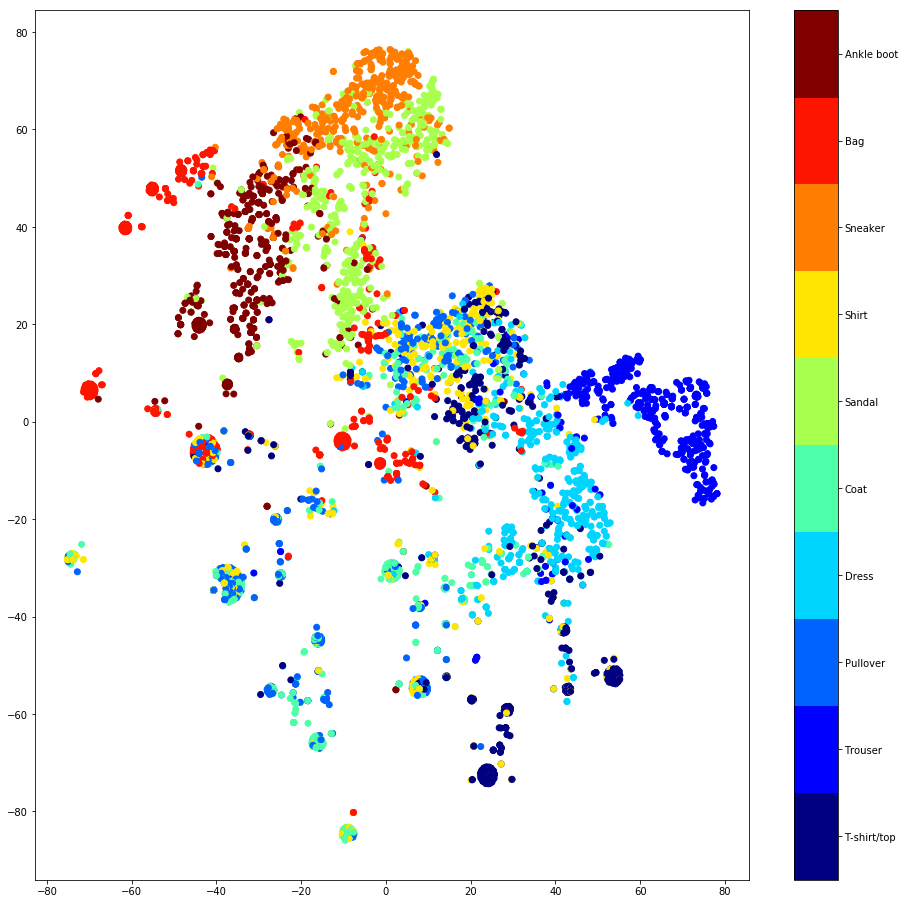

In [39]:
newVals=tsne_plot(hids,validating_data_class)

In [40]:
save_data(newVals,"tsneVals.dat")